In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Ionosphere\Ionosphere_AL_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1,0,0.99539,-0.05889,NaN,0.02306,NaN,-0.37708,NaN,NaN,...,NaN,NaN,0.41078,-0.46168,NaN,NaN,NaN,NaN,NaN,-0.45300
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238
3,1,0,NaN,-0.45161,NaN,1.00000,NaN,-1.00000,NaN,0.00000,...,NaN,0.90695,NaN,1.00000,NaN,-0.20099,NaN,1.00000,NaN,NaN
4,1,0,1.00000,-0.02401,NaN,0.06531,NaN,-0.23255,NaN,NaN,...,NaN,NaN,0.13290,-0.53206,NaN,NaN,NaN,NaN,NaN,-0.65697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,NaN,-0.05567,NaN,-0.04622,...,NaN,NaN,NaN,0.00123,NaN,0.12815,NaN,-0.10714,NaN,-0.04307
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
int64		column 1	0
int64		column 2	0
float64		column 3	36
float64		column 4	0
float64		column 5	104
float64		column 6	0
float64		column 7	138
float64		column 8	0
float64		column 9	138
float64		column 10	68
float64		column 11	138
float64		column 12	34
float64		column 13	138
float64		column 14	34
float64		column 15	68
float64		column 16	36
float64		column 17	138
float64		column 18	34
float64		column 19	138
float64		column 20	0
float64		column 21	70
float64		column 22	34
float64		column 23	138
float64		column 24	0
float64		column 25	138
float64		column 26	68
float64		column 27	104
float64		column 28	0
float64		column 29	138
float64		column 30	34
float64		column 31	138
float64		column 32	34
float64		column 33	138
float64		column 34	70


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
count,351.000000,351.0,315.000000,351.000000,247.000000,351.000000,213.000000,351.000000,213.000000,283.000000,...,213.000000,283.000000,247.000000,351.000000,213.000000,317.000000,213.000000,317.000000,213.000000,281.000000
mean,0.891738,0.0,0.651274,0.044372,0.580691,0.115889,0.542526,0.119360,0.474128,0.176098,...,0.406584,-0.097056,0.586809,-0.069538,0.472047,-0.024899,0.418668,-0.006382,0.392418,0.025202
std,0.311155,0.0,0.480638,0.441435,0.530779,0.460810,0.488495,0.520750,0.536515,0.487721,...,0.585192,0.499210,0.474648,0.550025,0.543242,0.514684,0.542642,0.514414,0.498633,0.439038
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.0,0.473525,-0.064735,0.377935,-0.024795,0.190480,-0.054840,0.054050,-0.051075,...,0.000000,-0.332390,0.360255,-0.443165,0.158730,-0.223700,0.096110,-0.243390,0.000000,-0.117170
50%,1.000000,0.0,0.871110,0.016310,0.790780,0.022800,0.727270,0.014710,0.660380,0.016390,...,0.575280,-0.025890,0.735500,-0.017690,0.615820,0.000000,0.546070,0.000000,0.501690,0.000000
75%,1.000000,0.0,1.000000,0.194185,0.995120,0.334655,0.951770,0.445675,0.930510,0.544830,...,0.900140,0.133330,0.999945,0.153535,0.943400,0.154360,0.874920,0.198490,0.821430,0.151140
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

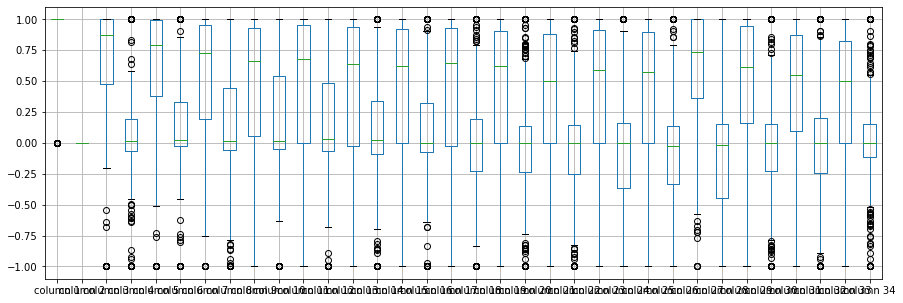

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     0.891738
column 2     0.000000
column 3     0.651274
column 4     0.044372
column 5     0.580691
column 6     0.115889
column 7     0.542526
column 8     0.119360
column 9     0.474128
column 10    0.176098
column 11    0.468538
column 12    0.156769
column 13    0.356018
column 14    0.068682
column 15    0.338113
column 16    0.077897
column 17    0.358834
column 18   -0.013326
column 19    0.374429
column 20   -0.024025
column 21    0.335305
column 22   -0.006594
column 23    0.385021
column 24   -0.057406
column 25    0.406584
column 26   -0.097056
column 27    0.586809
column 28   -0.069538
column 29    0.472047
column 30   -0.024899
column 31    0.418668
column 32   -0.006382
column 33    0.392418
column 34    0.025202
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
column 1,1.000000,NaN,0.280211,-0.006529,0.215834,0.127606,0.170040,0.027079,0.279931,-0.060265,...,0.060928,0.181434,-0.257983,-0.010725,0.079746,-0.130216,0.213185,-0.074628,0.183232,0.072471
column 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
column 3,0.280211,NaN,1.000000,0.130907,0.385305,0.027344,0.388803,0.064728,0.446248,0.054910,...,0.368640,-0.117723,-0.031749,0.136656,0.311836,0.046731,0.284912,0.005726,0.290928,0.081320
column 4,-0.006529,NaN,0.130907,1.000000,0.011117,-0.190308,-0.167673,0.255003,-0.399661,0.158142,...,-0.132720,-0.292889,-0.043372,0.000743,-0.113978,0.349788,-0.209549,-0.136657,-0.174394,0.030988
column 5,0.215834,NaN,0.385305,0.011117,1.000000,0.025504,0.607626,0.018940,0.395357,-0.017456,...,0.274108,0.001844,0.135977,0.208526,0.226768,0.074555,0.433580,0.019315,0.429226,-0.086441
column 6,0.127606,NaN,0.027344,-0.190308,0.025504,1.000000,-0.059808,0.274747,-0.107981,0.184828,...,-0.135475,0.076999,-0.136898,-0.068775,0.007482,-0.172760,-0.031820,0.314728,0.002012,0.171329
column 7,0.170040,NaN,0.388803,-0.167673,0.607626,-0.059808,1.000000,-0.231976,0.473073,-0.138840,...,0.296410,0.111525,0.066942,0.076030,0.268334,-0.088647,0.495419,-0.091777,0.654519,-0.153753
column 8,0.027079,NaN,0.064728,0.255003,0.018940,0.274747,-0.231976,1.000000,-0.340412,0.340412,...,-0.082634,-0.204186,-0.237403,0.072373,-0.120293,0.081550,-0.109973,0.160602,-0.221773,0.325272
column 9,0.279931,NaN,0.446248,-0.399661,0.395357,-0.107981,0.473073,-0.340412,1.000000,-0.306548,...,0.345121,0.201168,0.188220,0.183819,0.389803,-0.094961,0.355033,-0.082180,0.438042,-0.030877
column 10,-0.060265,NaN,0.054910,0.158142,-0.017456,0.184828,-0.138840,0.340412,-0.306548,1.000000,...,-0.219270,-0.041527,-0.185969,0.103826,-0.093278,-0.046489,-0.117897,0.010748,-0.141729,0.047039


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [34,34+20,34+20+20,34+20+20+20,34+20+20+20+20,34+20+20+20,34+20+20,34+20,34], vae_layer = False, seed = 200)
imputer.build_model(df)
imputer.train_model(training_epochs=50)


Size index: [34]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 15.8879459017799
Epoch: 1 , loss: 15.787855375380744
Epoch: 2 , loss: 15.883638609023322
Epoch: 3 , loss: 15.815942582629976
Epoch: 4 , loss: 15.721173785981678
Epoch: 5 , loss: 15.658144542149135
Epoch: 6 , loss: 15.569577807471866
Epoch: 7 , loss: 15.404075259254093
Epoch: 8 , loss: 15.693233399164109
Epoch: 9 , loss: 15.657146953401112
Epoch: 10 , loss: 15.45378725869315
Epoch: 11 , loss: 15.409363247099376
Epoch: 12 , loss: 15.314366113571893
Epoch: 13 , loss: 15.046049617585682
Epoch: 14 , loss: 14.748258545285179
Epoch: 15 , loss: 14.09980278923398
Epoch: 16 , loss: 14.041900271461124
Epoch: 17 , loss: 13.884186290559315
Epoch: 18 , loss: 13.858072553362165
Epoch: 19 , loss: 14.002467655000233
Epoch: 20 , loss: 13.73238468170166
Epoch: 21 , loss: 13.533887817746116
Epoch: 22 , loss: 13.65897950671968
Epoch: 23 , loss: 13.514247985113235
Epoch: 24 , loss: 13.74601886385963
Epoch: 25 , loss: 13.710

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(351, 34)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     0.0
column 2     0.0
column 3     1.0
column 4     1.0
column 5     0.0
column 6     0.0
column 7     0.0
column 8     0.0
column 9    -1.0
column 10   -1.0
column 11    0.0
column 12    0.0
column 13    0.0
column 14    0.0
column 15   -1.0
column 16   -1.0
column 17   -1.0
column 18   -1.0
column 19   -1.0
column 20    1.0
column 21   -1.0
column 22    1.0
column 23    0.0
column 24    0.0
column 25    0.0
column 26    0.0
column 27    1.0
column 28   -1.0
column 29   -1.0
column 30    1.0
column 31   -1.0
column 32    1.0
column 33   -1.0
column 34    1.0
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Ionosphere.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,0,0,0.000000,0.0,-0.311305,0.0,-0.301399,0.0,-0.558231,0.124825,...,-0.209234,0.417595,0.000000,0.0,0.236361,0.337054,-0.015403,0.560869,0.175656,0.000000
1,0,0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0,0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0,0,-0.370261,0.0,-0.446114,0.0,-0.200915,0.0,0.439620,0.000000,...,-0.608186,0.000000,0.066449,0.0,-0.509356,0.000000,0.174043,0.000000,0.705797,-0.990138
4,0,0,0.000000,0.0,-0.391595,0.0,-0.442204,0.0,-0.331448,0.328596,...,0.347199,0.585271,0.000000,0.0,0.394295,0.602164,0.434498,0.592249,0.444444,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,0,0,0.000000,0.0,0.000000,0.0,-0.512443,0.0,-0.624982,0.000000,...,-0.685766,-0.013314,-0.467790,0.0,-0.679227,0.000000,-0.581373,0.000000,-0.658645,0.000000
347,0,0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
348,0,0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
349,0,0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

27.622379574983245

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

68.46016929900117

In [18]:
NRMS=numerator/denominator
NRMS


0.40348102930248314

In [19]:
new_df.iloc[66,:]

column 1     1.00000
column 2     0.00000
column 3     1.00000
column 4     0.28046
column 5     1.00000
column 6     0.02477
column 7     1.00000
column 8     0.07764
column 9     1.00000
column 10    0.04317
column 11    0.98762
column 12    0.33266
column 13    1.00000
column 14    0.05489
column 15    1.00000
column 16    0.04384
column 17    0.95750
column 18   -0.24598
column 19    0.84371
column 20   -0.08668
column 21    1.00000
column 22    0.04150
column 23    0.99933
column 24    0.27376
column 25    1.00000
column 26   -0.39056
column 27    0.96414
column 28   -0.02174
column 29    0.86747
column 30    0.23360
column 31    0.94578
column 32   -0.22021
column 33    0.80355
column 34   -0.07329
Name: 66, dtype: float64

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1,0,0.995390,-0.05889,0.541125,0.02306,0.532581,-0.37708,0.441769,0.162425,...,0.358876,-0.094115,0.410780,-0.46168,0.449021,-0.003846,0.407267,0.015999,0.362066,-0.453000
1,1,0,1.000000,-0.18829,0.930350,-0.36156,-0.108680,-0.93597,1.000000,-0.045490,...,-0.203320,-0.265690,-0.204680,-0.18401,-0.190400,-0.115930,-0.166260,-0.062880,-0.137380,-0.024470
2,1,0,1.000000,-0.03365,1.000000,0.00485,1.000000,-0.12062,0.889650,0.011980,...,0.575280,-0.402200,0.589840,-0.22145,0.431000,-0.173650,0.604360,-0.241800,0.560450,-0.382380
3,1,0,0.629739,-0.45161,0.553886,1.00000,0.511245,-1.00000,0.439620,0.000000,...,0.391814,0.906950,0.582579,1.00000,0.490644,-0.200990,0.430863,1.000000,0.381977,0.009862
4,1,0,1.000000,-0.02401,0.549805,0.06531,0.478856,-0.23255,0.440072,0.164606,...,0.380059,-0.066309,0.132900,-0.53206,0.418605,-0.019806,0.377428,-0.003481,0.398364,-0.656970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.835080,0.08298,0.737390,-0.14706,0.331047,-0.05567,0.279428,-0.046220,...,0.268014,-0.055334,0.367000,0.00123,0.320773,0.128150,0.285227,-0.107140,0.246815,-0.043070
347,1,0,0.951130,0.00419,0.951830,-0.02723,0.934380,-0.01920,0.945900,0.016060,...,0.945200,0.013610,0.935220,0.04925,0.931590,0.081680,0.940660,-0.000350,0.914830,0.047120
348,1,0,0.947010,-0.00034,0.932070,-0.03227,0.951770,-0.03431,0.955840,0.024460,...,0.939880,0.031930,0.924890,0.02542,0.921200,0.022420,0.924590,0.004420,0.926970,-0.005770
349,1,0,0.906080,-0.01657,0.981220,-0.01989,0.956910,-0.03646,0.857460,0.001100,...,0.910500,-0.020990,0.891470,-0.07760,0.829830,-0.172380,0.960220,-0.037570,0.874030,-0.162430


In [21]:
imputations[-1].to_excel("Ionosphere_AL_20(imp).xlsx", index=False, header=False)